<a href="https://colab.research.google.com/github/ShubhamN56/PROJECTS/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
import pandas as pd
df=pd.read_csv("iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.shape

(150, 5)

In [ ]:
df.isna().sum()


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
df.duplicated().sum()

1

In [ ]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
x=df.drop(columns=["species"])
y=df[["species"]]

In [ ]:
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [ ]:
y.value_counts()

species   
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [ ]:
x.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

nump = make_pipeline(
    SimpleImputer(strategy="mean"),
    StandardScaler()
).set_output(transform="pandas")

xpre=nump.fit_transform(x)
xpre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [ ]:
#train test split

from sklearn.model_selection import train_test_split
xtr,xts,ytr,yts = train_test_split(xpre,y,random_state=21,test_size=0.33)

xtr.shape

(100, 4)

In [ ]:
ytr.shape

(100, 1)

In [ ]:
ytr.head()

,species
52,versicolor
49,setosa
65,versicolor
118,virginica
55,versicolor


In [ ]:
#Build model
from sklearn.linear_model import LogisticRegression
m=LogisticRegression()
m.fit(xtr,ytr)

LogisticRegression()

In [ ]:
m.intercept_

array([-0.1627398 ,  1.82302367, -1.66028386])

In [ ]:
m.coef_

array([[-0.93728904,  1.24988548, -1.63694748, -1.61318588],
       [ 0.38686136, -0.37382492, -0.41064574, -0.59860246],
       [ 0.55042768, -0.87606056,  2.04759322,  2.21178835]])

In [ ]:
m.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
#Model Evaluation
print("Train LR score = ",m.score(xtr,ytr))
print("Test LR score = ",m.score(xts,yts))


Train LR score =  0.98
Test LR score =  0.94


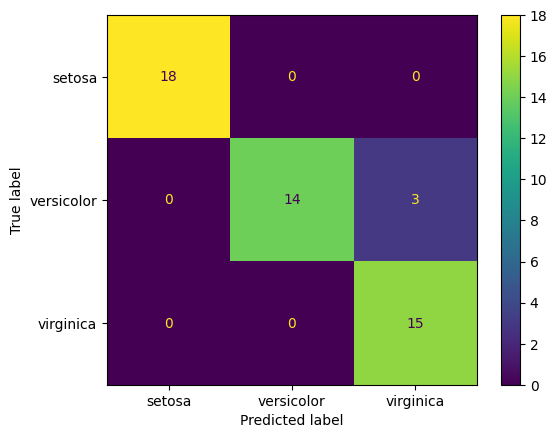

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(m,xts,yts)

In [ ]:
ypred_test = m.predict(xts)
ypred_test[0:5]

array(['versicolor', 'setosa', 'setosa', 'setosa', 'versicolor'],
      dtype=object)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(yts,ypred_test))



              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       1.00      0.82      0.90        17
   virginica       0.83      1.00      0.91        15

    accuracy                           0.94        50
   macro avg       0.94      0.94      0.94        50
weighted avg       0.95      0.94      0.94        50



In [ ]:
from sklearn.model_selection import cross_val_score
sc=cross_val_score(m,xtr,ytr,cv=5,scoring="f1_macro")
sc

array([0.90277778, 1.        , 1.        , 0.94871795, 1.        ])

In [ ]:
sc.mean()

0.9702991452991453

In [ ]:
#NEW SAMPLE

xnew = pd.read_csv("iris_sample.csv")
xnew.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.5,2.5,4.0,1.3
1,6.9,3.1,5.1,2.3
2,5.1,2.5,3.0,1.1
3,4.4,2.9,NaN,0.2
4,5.9,3.0,5.1,1.8


In [ ]:
xnewp=nump.transform(xnew)
xnewp.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.416010,-1.282963,0.137547,0.132510
1,1.280340,0.098217,0.762758,1.448832
2,-0.900681,-1.282963,-0.430828,-0.130755
3,-1.748856,-0.362176,0.000000,-1.315444
4,0.068662,-0.131979,0.762758,0.790671


In [ ]:
pred=m.predict(xnewp)
pred

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'setosa', 'versicolor', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'versicolor', 'virginica'],
      dtype=object)

In [ ]:
m.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
prob=m.predict_proba(xnewp)
prob

array([[1.93292727e-02, 8.82537594e-01, 9.81331333e-02],
       [1.80315390e-04, 6.76221053e-02, 9.32197579e-01],
       [9.73213051e-02, 8.91868487e-01, 1.08102083e-02],
       [7.45709340e-01, 2.54116291e-01, 1.74368528e-04],
       [5.90541932e-03, 3.31763397e-01, 6.62331183e-01],
       [9.63296887e-01, 3.67026084e-02, 5.04715947e-07],
       [1.60683756e-01, 8.11677570e-01, 2.76386741e-02],
       [7.55605408e-04, 1.55677416e-01, 8.43566978e-01],
       [9.85175448e-01, 1.48243463e-02, 2.05612795e-07],
       [8.87027458e-01, 1.12886703e-01, 8.58384446e-05],
       [2.30367528e-02, 8.97506058e-01, 7.94571891e-02],
       [2.62907569e-02, 9.48058330e-01, 2.56509126e-02],
       [3.40647499e-06, 1.34534099e-02, 9.86543184e-01],
       [5.75880409e-03, 6.45418038e-01, 3.48823158e-01],
       [4.93349887e-04, 4.04352561e-01, 5.95154090e-01]])

In [ ]:
xnew["Species_prediction"]=pred
xnew[m.classes_]=prob


In [ ]:
xnew["Species_prediction"].value_counts()


Species_prediction
versicolor    6
virginica     5
setosa        4
Name: count, dtype: int64

In [ ]:
#save
import joblib

joblib.dump(nump,"pre.joblib")

joblib.dump(m,"model.joblib")

p=joblib.load("pre.joblib")
p

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [ ]:
p=joblib.load("model.joblib")
p


LogisticRegression()